### Problem Statement:
Netflix wants to understand what kind of content (Movies vs TV Shows, genres, ratings, countries, etc.) resonates with audiences globally. Based on these insights, Netflix aims to decide which type of shows/movies to produce and how to grow the business in different regions.


### Objective:
- To understand the structure and quality of the dataset by examining data types, missing values, and distributions.  
- To explore the trends in content addition over time and compare it with the release year of shows and movies.  
- To identify the distribution of content across **type** (Movies vs TV Shows), **genres**, **countries**, and **ratings**.  
- To analyze popular actors, directors, and genres to understand the diversity of content.  
- To visualize and interpret key patterns such as release year trends, top contributing countries, and most common ratings.  
- To generate actionable insights and recommendations that can help understand Netflix’s content strategy and global reach.  

### Import required Libraies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Load the data

In [3]:
world = gpd.read_file("ne_110m_admin_0_countries.zip")
world = world.rename(columns={'ADMIN': 'country'})
df = pd.read_csv('netflix.csv')

### Basic Data Analyis



In [ ]:
## First 5 records of my dataframe

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Shape of data
df.shape

(8807, 12)

In [5]:
# Data types of all attributes
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
## How many of types of content Netflix produces Movie, TV Show or there are other categories also ?
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [6]:
# Missing value detection
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [22]:
# creating variables movies & tvshows for easy exploration of data
movies = df[df['type'] == 'Movie']
tvshows = movies = df[df['type'] == 'TV Show']

### Data Overview

* Dataset includes ~8,800 Netflix Movies & TV Shows.

* Key columns: type, title, director, cast, country, release_year, date_added, rating, duration, listed_in, description.

* Categorical attributes: type, rating, country, listed_in, director, cast.

* Continuous attributes: release_year, duration (minutes for Movies, seasons for TV Shows).

* Missing values found in director, cast, country → handled accordingly.

### Univariate Analysis - Non Graphical & Visual

In [ ]:
## 1. Univariate
## 2. Bi-Variate
## 3. Multi-variate

#### Type

In [ ]:
df["type"].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
df['type'].value_counts()/len(df) * 100

,count
type,
Movie,69.615079
TV Show,30.384921


<Axes: xlabel='type', ylabel='count'>

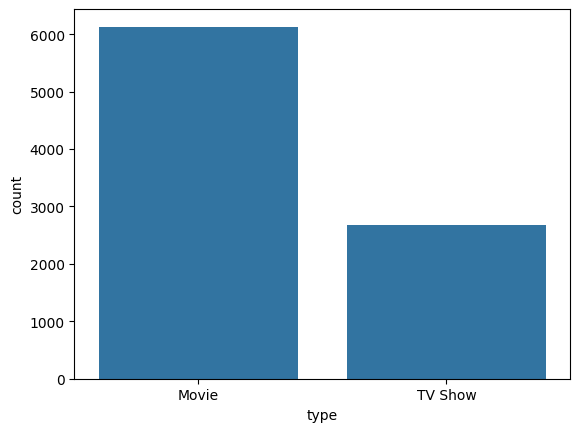

In [ ]:
sns.countplot(x = df['type'])

Insights: Netflix's 70% of all content are movies and rest of 30% are TV shows.

#### Release Year

In [ ]:
top_10_years_with_most_released_movies = df['release_year'].value_counts().head(10)
print(top_10_years_with_most_released_movies)
percentage_2016_to_2020 = df['release_year'].value_counts().head(5).sum()/len(df) * 100
print(f'Percentage of movies release between 2016 to 2020 = {round(percentage_2016_to_2020,2)}%')

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64
Percentage of movies release between 2016 to 2020 = 57.5%


<Axes: xlabel='release_year', ylabel='Count'>

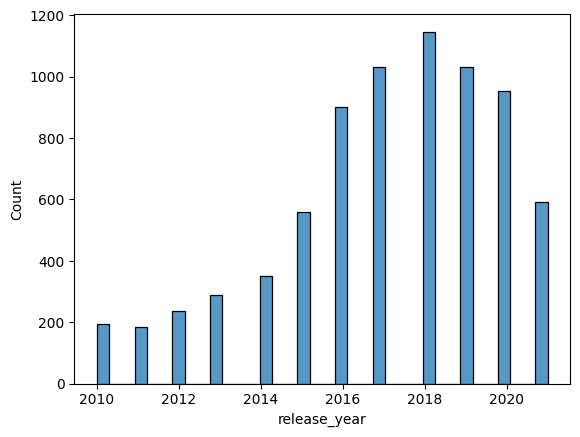

In [ ]:
sns.histplot(x=df['release_year'], binrange=[2010, 2021])

Insights : From 2016 to 2020, 57% of Netflix shows were released.

#### Rating

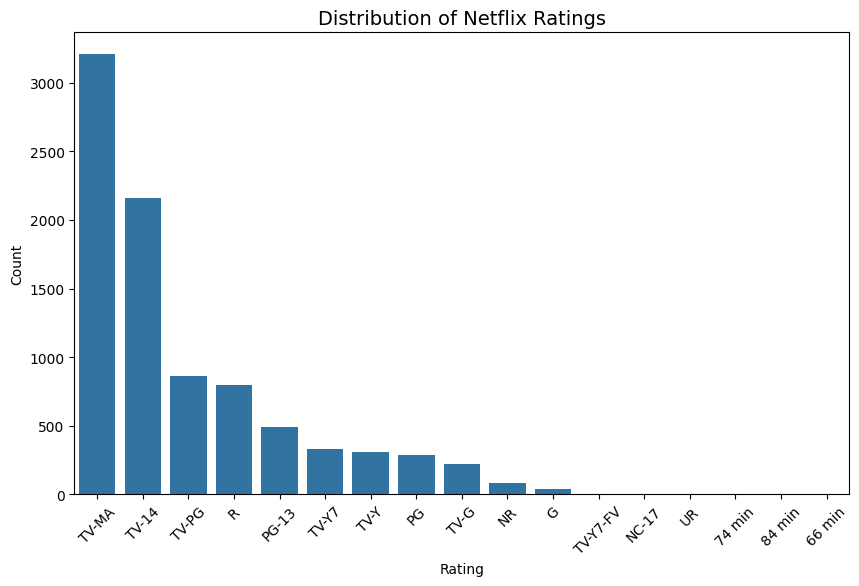

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title("Distribution of Netflix Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Date Added

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], format='mixed')
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month_name()
df['day'] = df['date_added'].dt.day
df['day_name'] = df['date_added'].dt.day_name()

<Axes: xlabel='day_name', ylabel='count'>

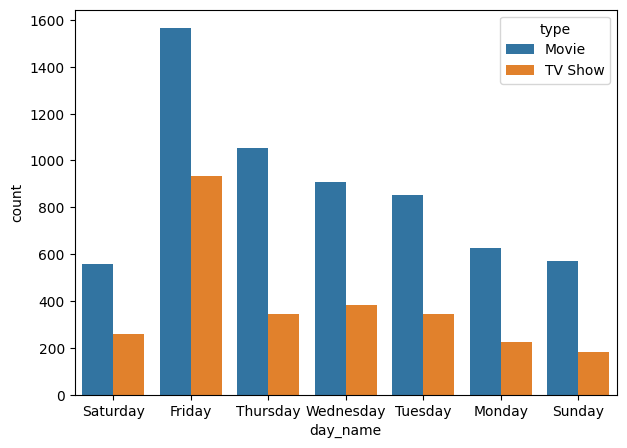

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x= 'day_name', hue='type')

Insights: Most of the movies and TV shows are released on Fridays and least number of movies & TV shows are released on Sundays.

<Axes: xlabel='month', ylabel='count'>

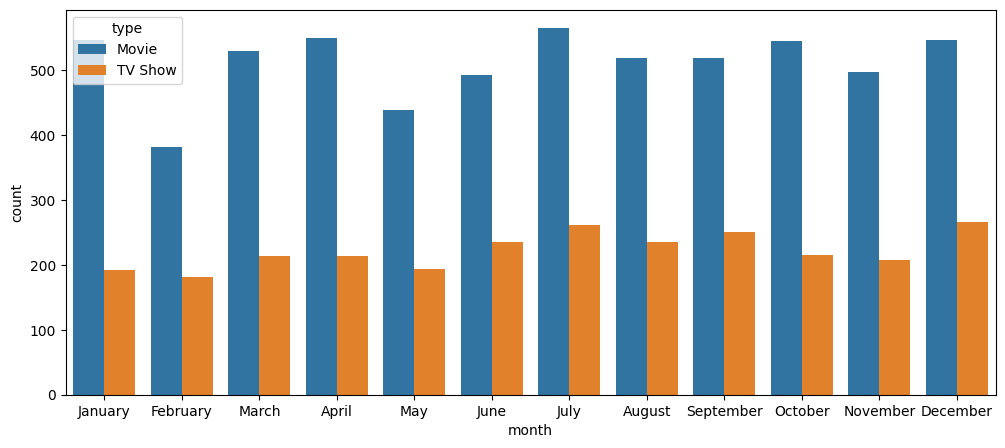

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x= 'month', hue='type', order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

Insights: Releasing movies and TV shows are consistent throughout the year. Slightly less in May & February months.

#### Listed in (tags)

In [ ]:
# Splitng string into array of string for better analysis
df['listed_in'] = df['listed_in'].str.split(', ')

In [ ]:
genres_data = df['listed_in']
all_genres = []
for arr in genres_data:
  all_genres.extend(arr)
all_genres = pd.Series(all_genres)
all_genres.value_counts().head(10)

,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


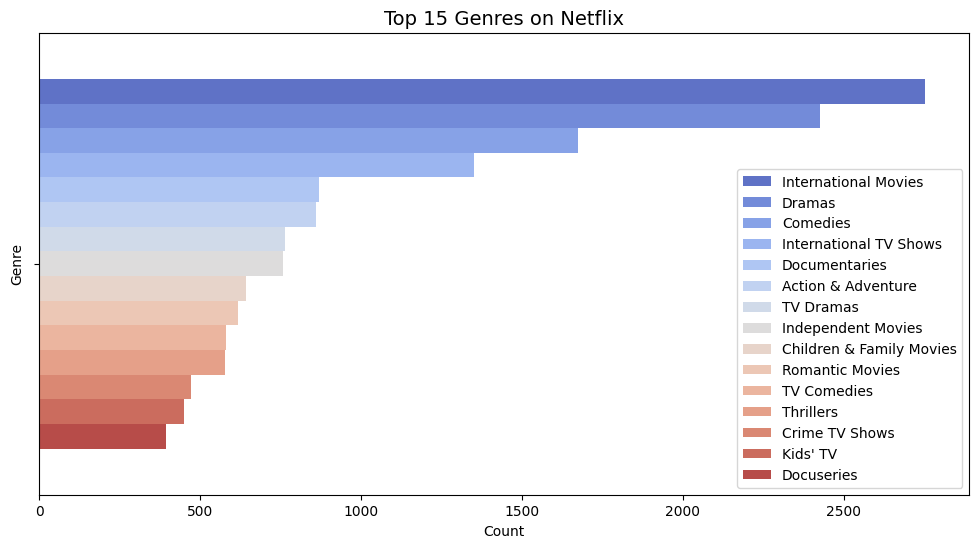

In [9]:
# Extract genres from 'listed_in'
from collections import Counter

genre_list = []
for i in df['listed_in'].dropna():
    genre_list.extend(i.split(", "))

genre_count = Counter(genre_list).most_common(15)
genres, counts = zip(*genre_count)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), hue=list(genres), palette="coolwarm")
plt.title("Top 15 Genres on Netflix", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Insights: International Movies, Dramas, Comedies & International TV Shows are 93% of Netflix content.

#### Country

<Axes: xlabel='country', ylabel='count'>

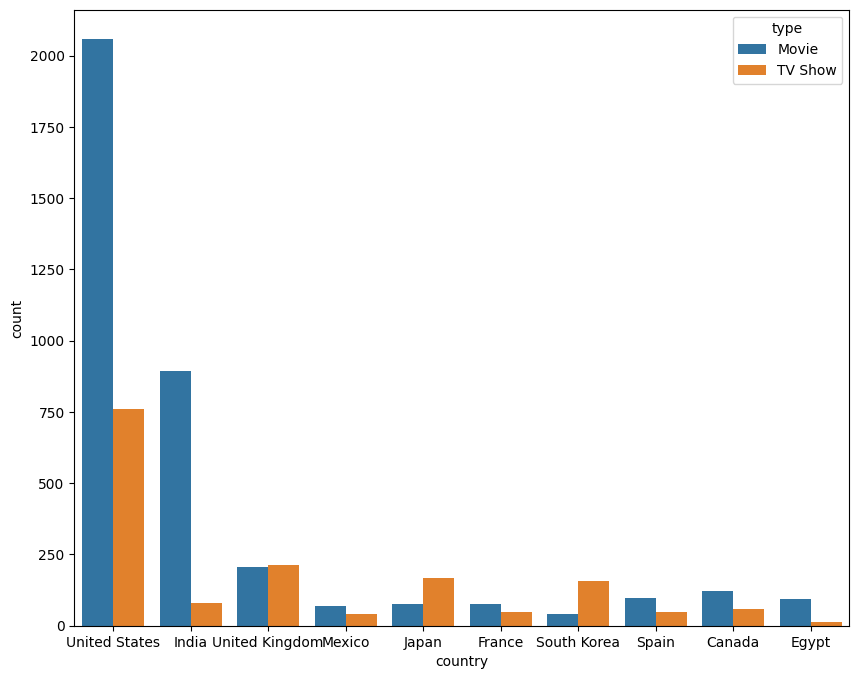

In [ ]:
top_10_countries = df['country'].value_counts().reset_index().head(10)['country'].unique()
top_10_countries_data = df[df['country'].isin(top_10_countries)]
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(data=top_10_countries_data, x = 'country', hue='type')

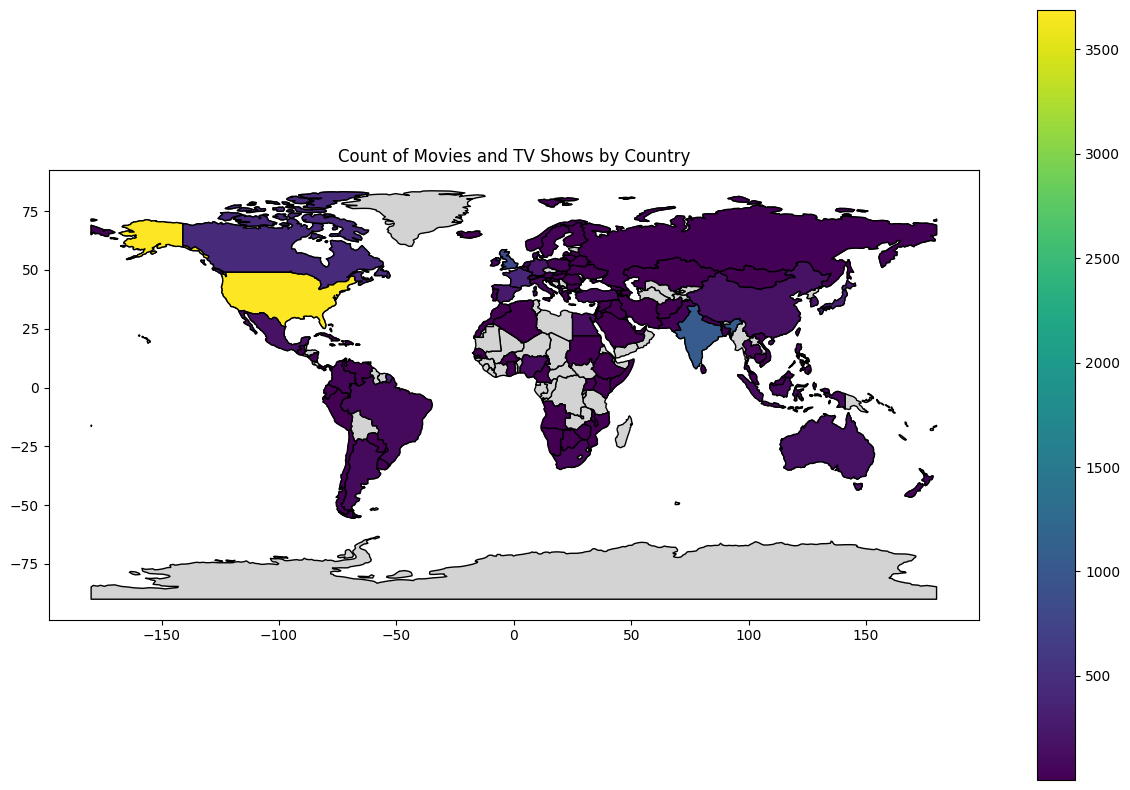

In [ ]:
country_counts = {}
for countries_list in df['country'].dropna():
    for country in countries_list.split(', '):
        country_counts[country] = country_counts.get(country, 0) + 1

countries_df = pd.DataFrame(country_counts.items(), columns=['country', 'count'])
countries_df['country'] = countries_df['country'].replace('United States', 'United States of America')

merged_data = world.merge(countries_df, left_on='country', right_on='country', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
merged_data.plot(column='count', cmap='viridis', legend=True, ax=ax, edgecolor='black')

ax.set_title("Count of Movies and TV Shows by Country")
plt.show()

In [ ]:
countries_df.sort_values(by='count', ascending=False)

,country,count
0,United States of America,3689
2,India,1046
5,United Kingdom,804
15,Canada,445
12,France,393
...,...,...
122,Sudan,1
123,Panama,1
124,Uganda,1
125,East Germany,1


In [ ]:
countries_df.index = countries_df['country']
countries_df.sort_values(by='count', inplace=True, ascending=False)
round(countries_df['count'] * 100/len(df),2)

,count
country,
United States of America,41.89
India,11.88
United Kingdom,9.13
Canada,5.05
France,4.46
...,...
Puerto Rico,0.01
Kazakhstan,0.01
Lithuania,0.01


Insights:
* 41.89% of Netflix content are made by United States. India stands second with 11.88% and UK on third with 9.13%.
* Japan, South Korea & United Kingdom produces more TV shows than movies. Rest of the world produces more movies then TV shows.

#### Duration

<Axes: xlabel='mins', ylabel='Count'>

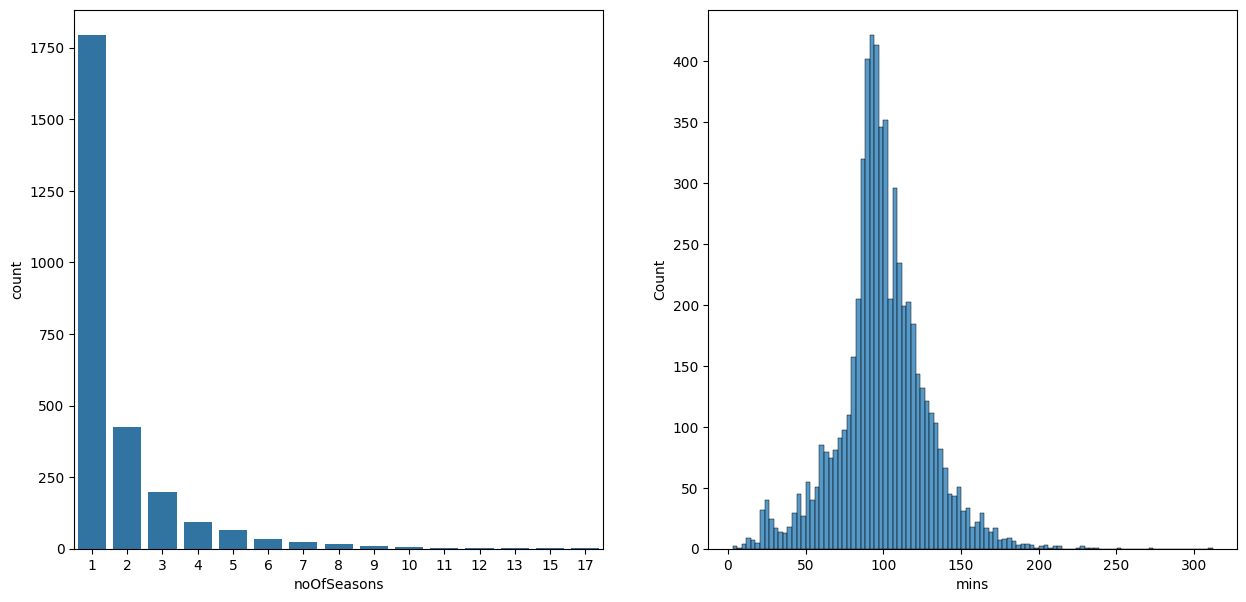

In [ ]:
tvshows_seasons = tvshows[tvshows['duration'].str.contains('Season', na=False)]['duration'].str.split(' ').to_list()
tvshows_seasons = pd.DataFrame({ 'noOfSeasons': [ int(arr[0]) for arr in tvshows_seasons ]})
movies_mins = df[(df['duration'].str.contains('min', na=False)) & (df['type'] == 'Movie' )]['duration'].str.split(' ').to_list()
movies_mins = pd.DataFrame({ 'mins': [ int(arr[0]) for arr in movies_mins ]})
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(x=tvshows_seasons['noOfSeasons'])
plt.subplot(1,2,2)
sns.histplot(x=movies_mins['mins'])

Insights:


*   Total number of seasons of 90% of TV Shows are in range of 1-3 only. In which 67% of TV Shows are having only one season.  
*   Most of the movies duration are in range of 90 mins to 120 mins.



### Bivariate - Non Graphical & Visual

#### Release Year vs Duration

<Axes: xlabel='release_year', ylabel='mins'>

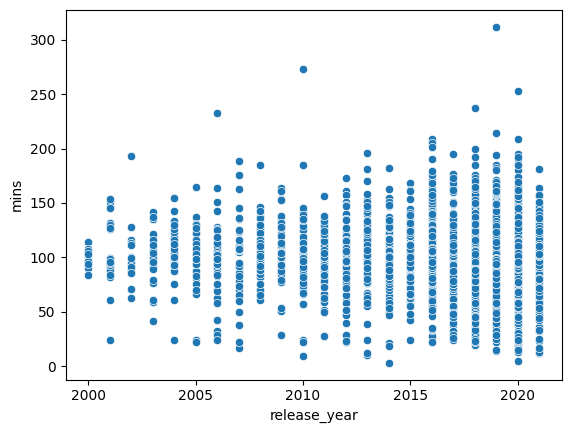

In [ ]:
movies_mins['release_year']  = df[(df['duration'].str.contains('min', na=False)) & (df['type'] == 'Movie' ) & (df['release_year'] >= 2000) & (df['release_year']  <= 2021) ]['release_year']
movies_mins_without_na = movies_mins.dropna()
sns.scatterplot(data=movies_mins_without_na, x="release_year", y="mins")

Insights: There is no correlation between release year and duration.

#### Release year vs Type

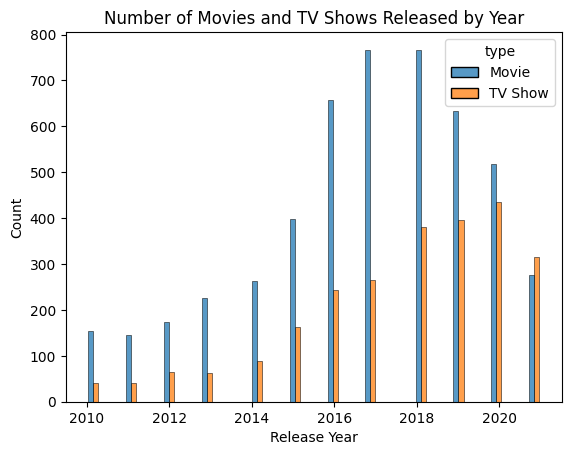

In [ ]:
sns.histplot(data=df, x='release_year', binrange=[2010, 2021], hue='type', multiple="dodge", shrink=.8)
plt.title('Number of Movies and TV Shows Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

Insights: In decade of 2010 -
* Number of movies & TV shows production increased every year till 2018.
* Number of movies produced were more than TV shows but based on data of year 2021, there were more TV shows produced than movies.   

#### Release year vs Country

<Axes: xlabel='release_year', ylabel='country'>

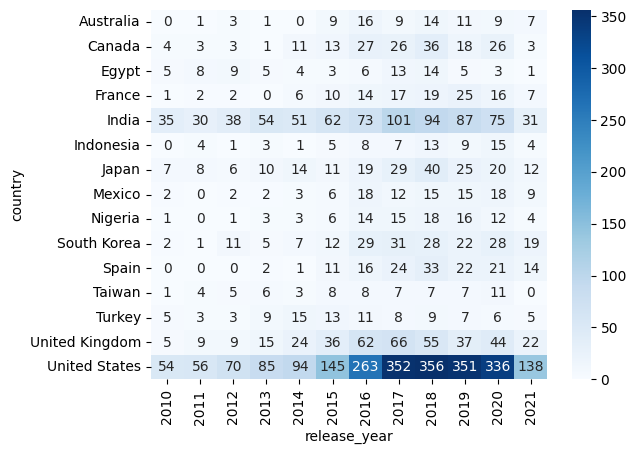

In [ ]:
top_10_countries = df['country'].value_counts().head(15).reset_index()['country'].to_list()
rel_yr_vs_country = df[(df['country'].isin(top_10_countries)) & (df['release_year']>= 2010) & (df['release_year']<=2021)]
crosstab = pd.crosstab(rel_yr_vs_country['country'], rel_yr_vs_country['release_year'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')


Insights:
* Mostly every country's annual content production was increasing till 2018, afterwards started decreasing.

* US dominance is shrinking → Netflix must diversify and rely more on India, Korea, and UK for content.

* India + Korea are the fastest-growing & most promising hubs — Netflix should invest more in regional productions here.

* Spain & Turkey show strong regional importance → can be targeted for local language originals.

* Post-pandemic dip suggests Netflix should speed up co-productions and licensing to maintain content flow.

#### Release year vs rating

<Axes: xlabel='release_year', ylabel='rating'>

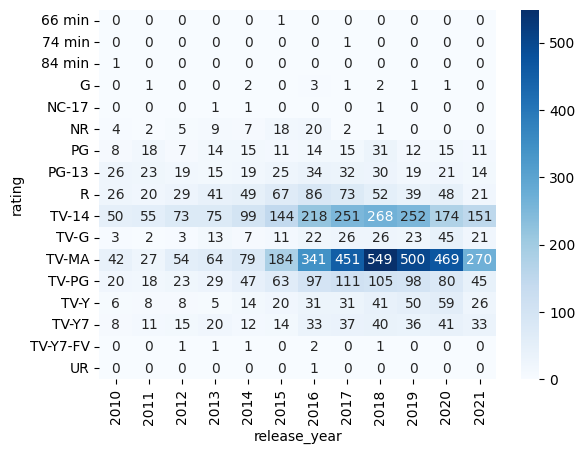

In [ ]:
crosstab = pd.crosstab(df['rating'], df[(df['release_year']>= 2010) & (df['release_year']<=2021)]['release_year'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')

insights:
* Production of Mature Adult content is increasing every year very rapidly. In 2010 it was 42 while in 2018 it was 549.
* Production of  TV-14 (over age 14) is also increasing every year but it stands second. In 2010 it was 50 while in 2018 it was 268.
* Earlier from 2010-2014, over age 14 & 13 years based content were mostly produced every year but shifted towards Mature Adult content.  

#### Rating with type

<Axes: xlabel='country', ylabel='rating'>

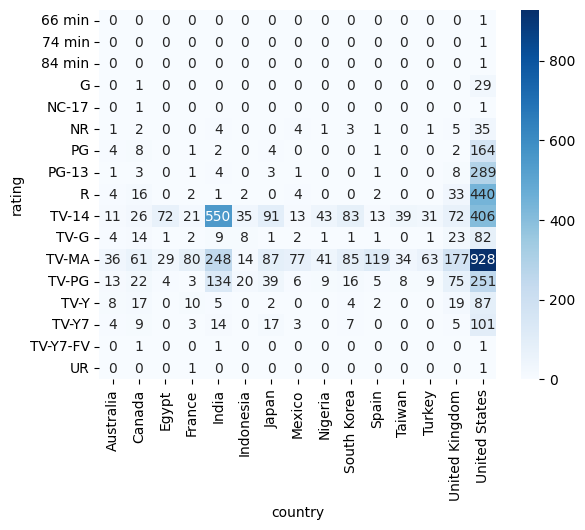

In [ ]:
top_10_countries = df['country'].value_counts().head(15).reset_index()['country'].to_list()
rating_vs_country = df[df['country'].isin(top_10_countries)]
crosstab = pd.crosstab(rating_vs_country['rating'], rating_vs_country['country'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')



Insights:
* US, Canada & most of the european countries more focus on mature adult content while asian countries are more focusing above 14 years based movies.
* US makes the most of mature adult content.

#### Rating with type

<Axes: xlabel='rating', ylabel='count'>

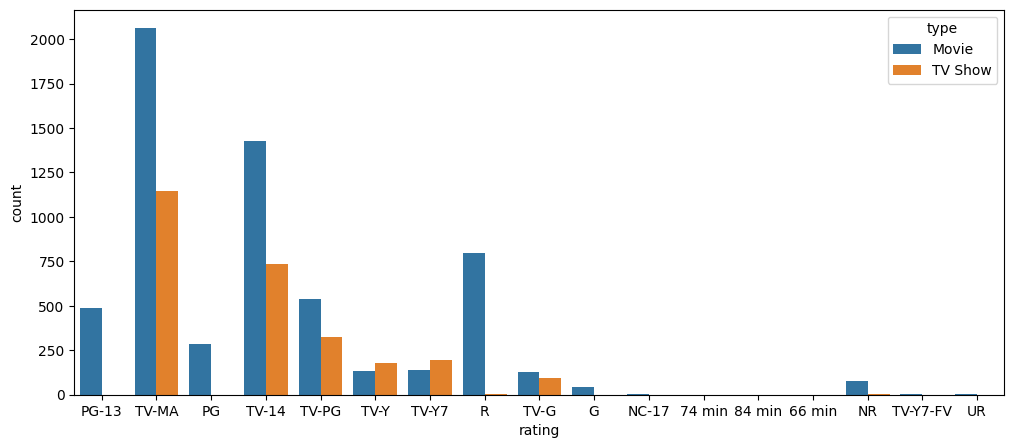

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='rating', hue='type')

Insights:

* Adult audience is Netflix’s biggest market → Heavy investment in TV-MA content is justified.

* Teen/Young Adult (TV-14) is the second strongest segment, proving that Netflix caters well to the 13–18 age group.

* Kids content is underrepresented → Competitors like Disney+ and Amazon Prime focus heavily here. Netflix could expand children/family content to capture households with kids.

* Movies still dominate Netflix’s catalog overall (especially PG, PG-13, R), but TV Shows are catching up in teen/adult ratings.

#### Date added vs Release year

In [12]:
# Ensure proper datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Calculate difference between release year and year added
df['year_diff'] = df['year_added'] - df['release_year']

# Drop rows where difference can't be computed
df_valid = df.dropna(subset=['year_diff'])

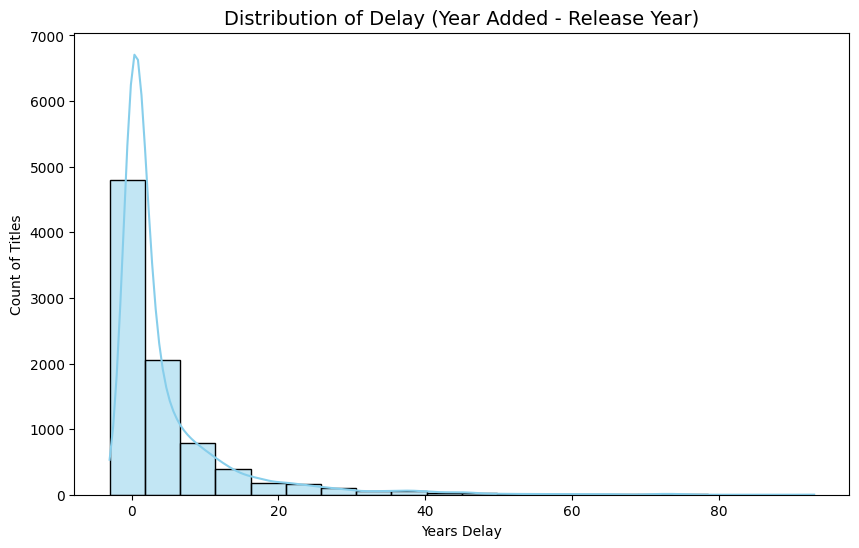

In [13]:
# Distribution of year differences
plt.figure(figsize=(10,6))
sns.histplot(df_valid['year_diff'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Delay (Year Added - Release Year)", fontsize=14)
plt.xlabel("Years Delay")
plt.ylabel("Count of Titles")
plt.show()

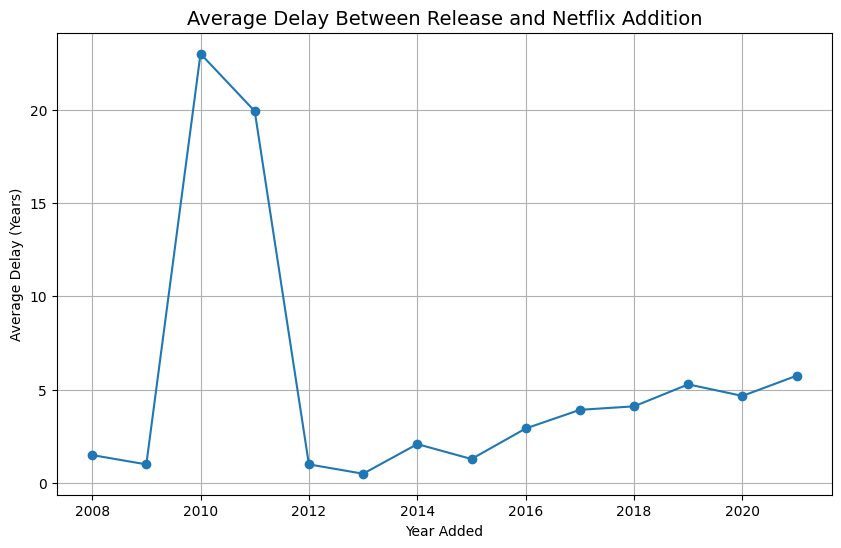

In [14]:
avg_delay = df_valid.groupby('year_added')['year_diff'].mean()

plt.figure(figsize=(10,6))
avg_delay.plot(marker='o')
plt.title("Average Delay Between Release and Netflix Addition", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Average Delay (Years)")
plt.grid(True)
plt.show()

Insights:

* Most Netflix content is added within **1-3 years of its release date**.  
* Some older movies/TV shows (from 1970s, 1980s, etc.) were added much later, showing Netflix’s effort to diversify its catalog.
* Recently (2018–2021), the delay has slightly increased (~5 years).

#### Actor/Director Collaboration Frequency

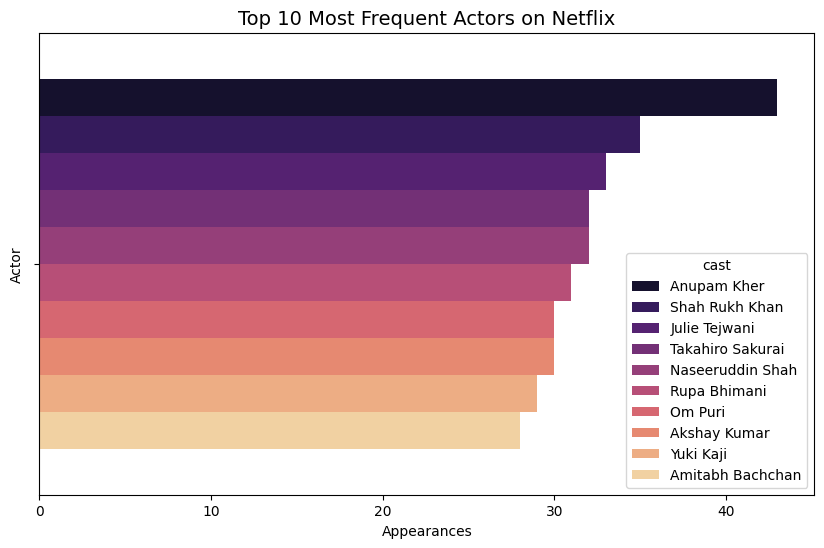

In [11]:

top_actors = df['cast'].dropna().str.split(", ").explode().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_actors.values, hue=top_actors.index, palette="magma")
plt.title("Top 10 Most Frequent Actors on Netflix", fontsize=14)
plt.xlabel("Appearances")
plt.ylabel("Actor")
plt.show()

#### Duration vs type

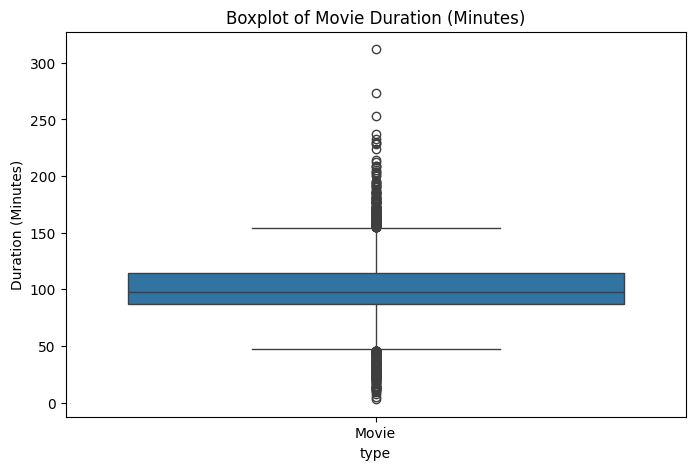

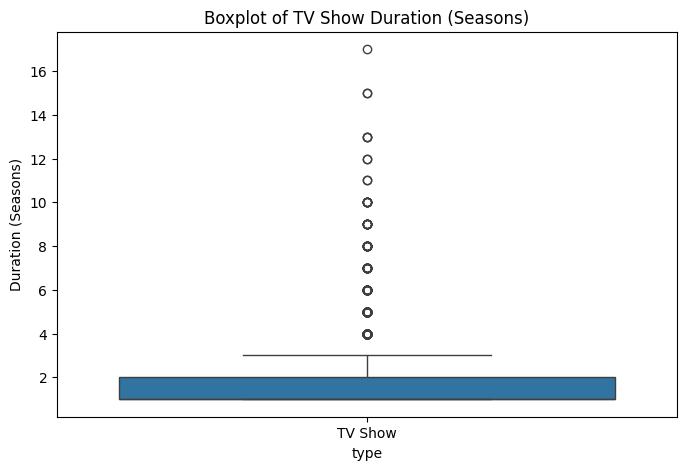

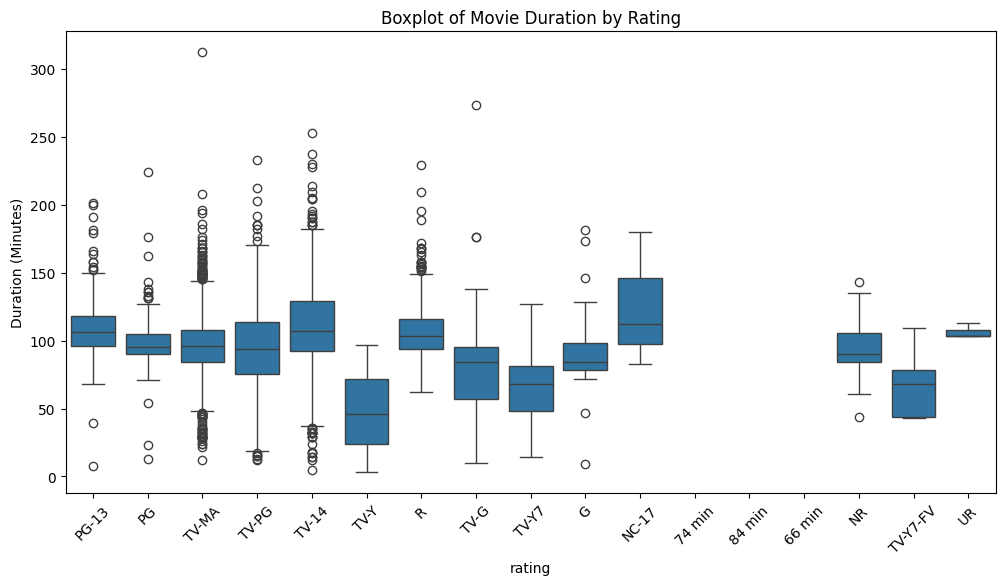

In [26]:
# Convert duration column into numeric values for plotting
df_movies = df[df['type'] == 'Movie'].copy()
df_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric values from duration
df_movies['duration_num'] = df_movies['duration'].str.replace(' min','').astype(float)
df_shows['duration_num'] = df_shows['duration'].str.replace(' Season','').str.replace('s','').astype(float)

# Boxplot for Movies (duration in minutes)
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration_num', data=df_movies)
plt.title('Boxplot of Movie Duration (Minutes)')
plt.ylabel('Duration (Minutes)')
plt.show()

# Boxplot for TV Shows (duration in seasons)
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='duration_num', data=df_shows)
plt.title('Boxplot of TV Show Duration (Seasons)')
plt.ylabel('Duration (Seasons)')
plt.show()

# Duration vs Rating (Movies only, since ratings apply better here)
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='duration_num', data=df_movies)
plt.title('Boxplot of Movie Duration by Rating')
plt.xticks(rotation=45)
plt.ylabel('Duration (Minutes)')
plt.show()

Insights:
 * Most movies fall in the **90–120 minutes** range, which is typical for feature films.  
 * A large chunk of movies are also around **60–90 minutes**, likely short films or regional cinema.  
 * For TV shows, the most common duration is **1 season**, though a few shows have multiple seasons.  
 * This indicates Netflix focuses heavily on standard-length content while still experimenting with shorter formats.

### Business Insights

- Netflix’s catalog is **heavily skewed towards Movies**, but TV Shows are steadily gaining traction as multi-season series help retain users for longer.  
- The platform offers a **diverse genre mix**, with Drama, Comedy, and Documentaries leading, showing Netflix’s strategy to appeal to a wide global audience.  
- **Content duration trends** show that most movies stick to the standard 90–120 mins format, while most shows are limited to 1 season, reflecting Netflix’s “test-and-expand” approach before committing to longer series.  
- **Regional content is booming** – especially from India, Japan, and South Korea – highlighting Netflix’s heavy investments in non-US markets to attract and retain new subscribers.  
- **Post-2015 growth** in titles directly correlates with Netflix’s global expansion and original content push, making it less dependent on licensed content.  
- The balance between **global blockbusters and regional hits** shows Netflix’s dual strategy: dominate mainstream audiences while also building strong local connections.  
- Overall, Netflix is not just building a streaming library – it’s shaping itself as a **global entertainment ecosystem**, balancing scale, diversity, and personalization to stay ahead of competitors.  

### Recommendations (Actionable, Non-Technical)

1. **Grow the Kids/Family Lane**
   - Commission **animated series** and **family adventure films** in top markets.
   - Build **franchise-able characters/IP** to drive repeat viewing and merchandising.

2. **Bet Bigger on India & Korea; Keep Spain/UK/Japan Warm**
   - Secure **early-window licenses** and **co-productions** to reduce delay.
   - Invest in **globally exportable stories** (thrillers, survival, romance dramas).

3. **Keep the Limited-Series Engine Running**
   - Perfect the **6–8 episode** bingeable format with tight pacing.
   - Plan **seasonal event drops** (festivals/holidays) for predictable spikes.

4. **Sharpen Freshness Targets**
   - Aim for **≤2 years** median delay for high-demand genres in priority countries.
   - Use **demand signals** (search/trailer interactions) to chase timely licenses.

5. **Program for “Quick Wins”**
   - Promote **Quick Watch** rows (sub-100-min movies; mini-series you can finish tonight).
   - Weeknight/editorial collections can lift daily engagement.

6. **Data-Driven Classics**
   - Acquire older titles **only when** data shows **evergreen pull** (high rewatchability, strong brand search).

7. **Localization That Sells**
   - Double down on **high-quality dubs/subs** for cross-border hits.
   - **Local talent + universal genres** (crime, romance, survival) = best export odds.